In [1]:
#https://archive.ics.uci.edu/dataset/109/wine

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.figsize']=(10,10)

In [2]:
df=pd.read_csv("wine.data")
df.sample(5)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
142,3,13.62,4.95,2.35,20.0,92,2.00,0.80,0.47,1.02,4.4,0.91,2.05,550
13,1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.5,1.20,3.00,1547
109,2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562
28,1,14.02,1.68,2.21,16.0,96,2.65,2.33,0.26,1.98,4.7,1.04,3.59,1035
74,2,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.8,1.23,2.14,428


In [3]:
df.columns = ['Label',
'Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash', 
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline']

df.sample()

,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
55,1,14.22,1.7,2.3,16.3,118,3.2,3.0,0.26,2.03,6.38,0.94,3.31,970


<AxesSubplot: xlabel='Alcohol', ylabel='Label'>

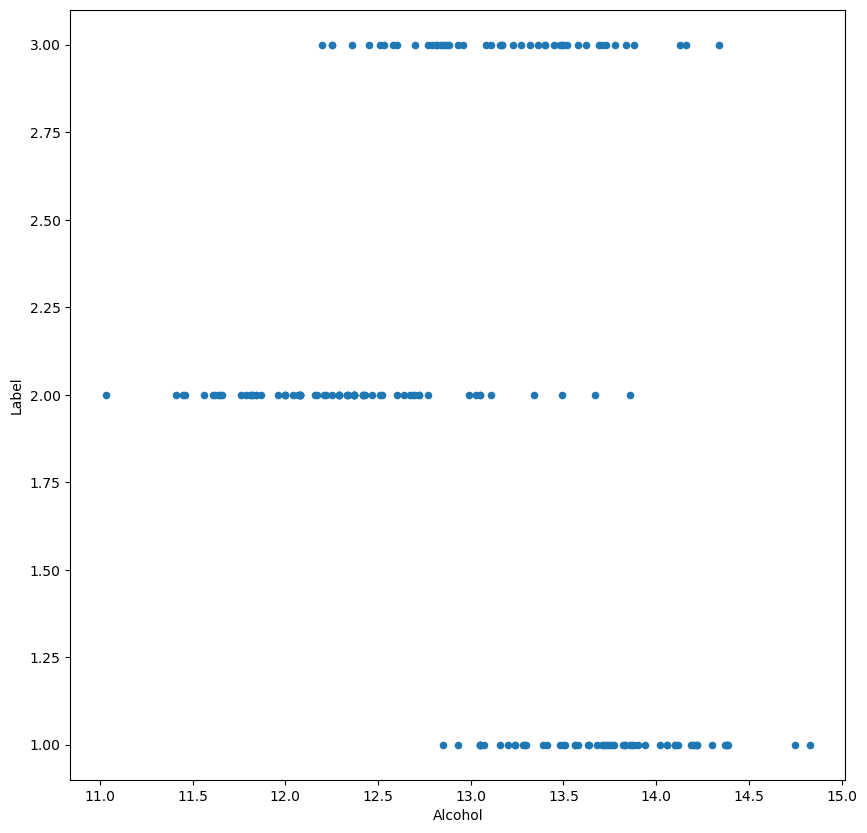

In [4]:
df.plot.scatter(x='Alcohol', y ='Label')

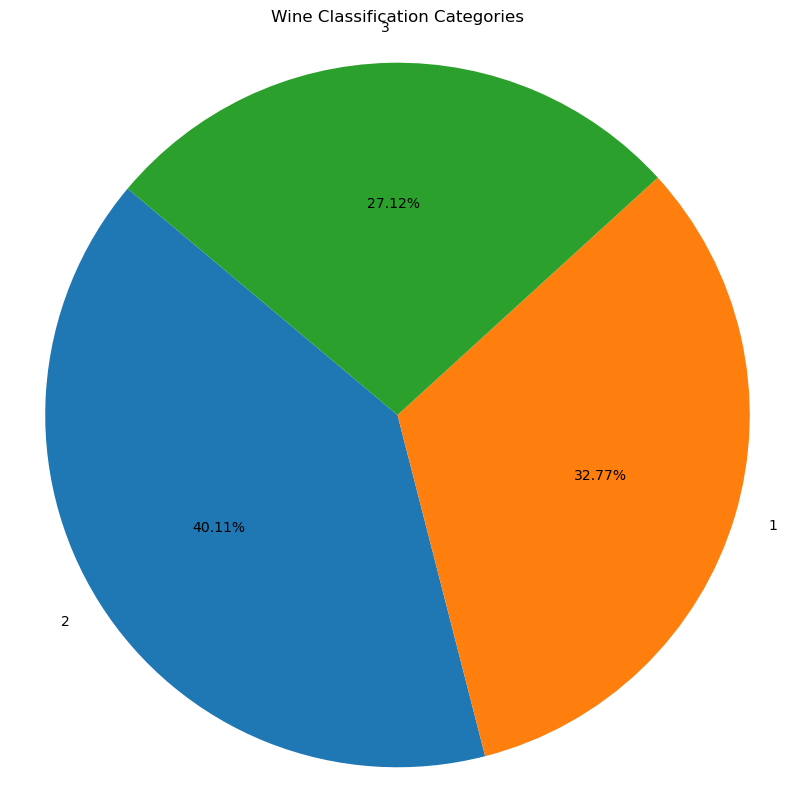

In [5]:
plt.pie(df['Label'].value_counts(), labels=df['Label'].value_counts().index, autopct='%0.2f%%', startangle=140)
plt.title('Wine Classification Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

Text(0, 0.5, 'Frequency')

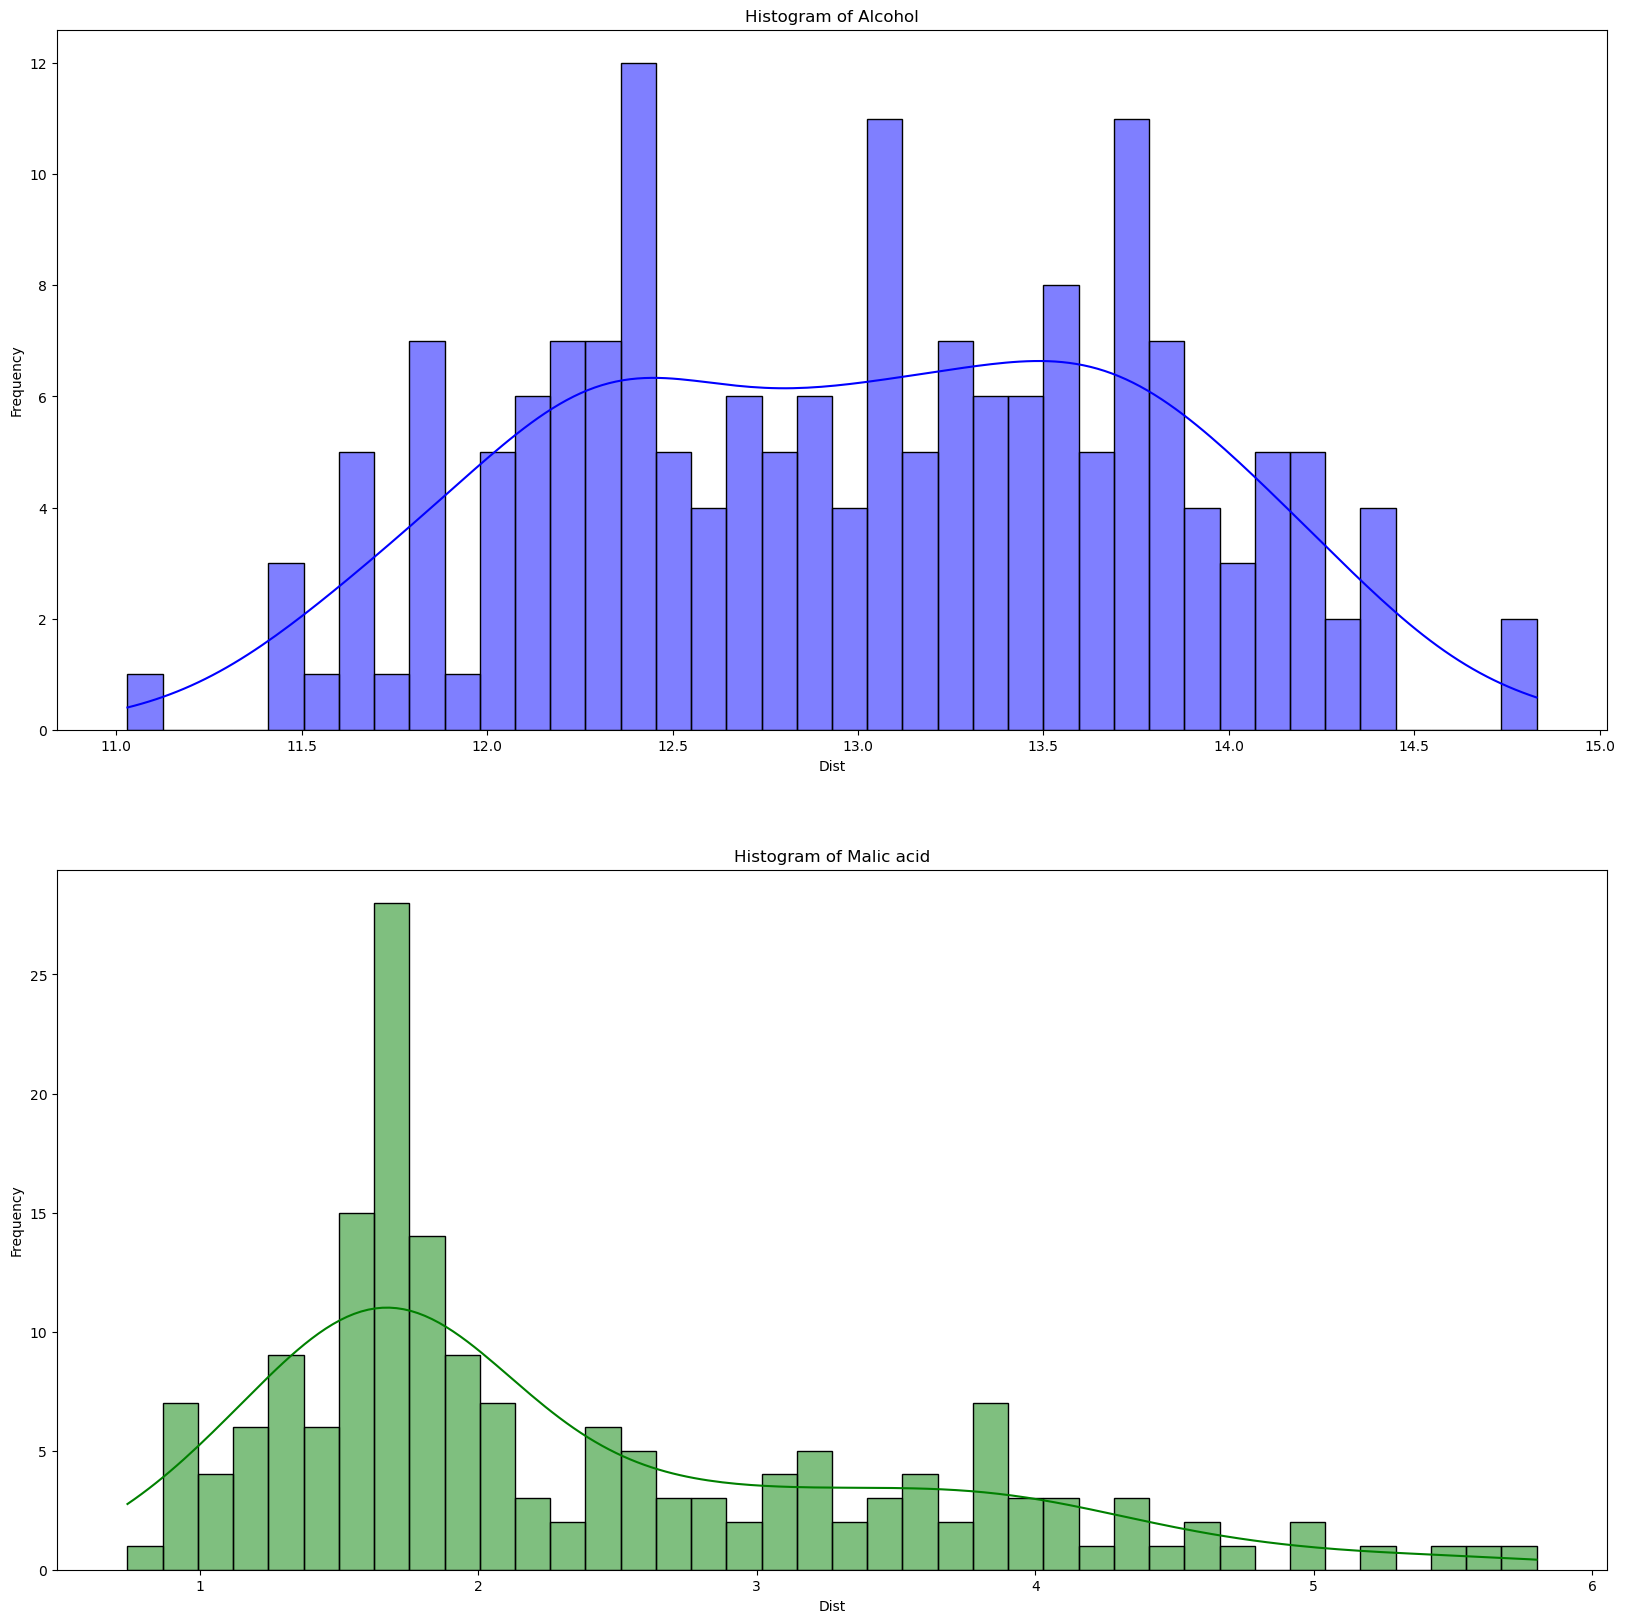

In [6]:
fig,axes=plt.subplots(2,1,figsize=(20,20))

sns.histplot(ax=axes[0],data = df['Alcohol'],kde=True,bins=40,color='blue')
axes[0].set_title('Histogram of Alcohol')
axes[0].set_xlabel('Dist')
axes[0].set_ylabel('Frequency')

sns.histplot(ax=axes[1],data = df['Malic acid'],kde=True,bins=40,color='green')
axes[1].set_title('Histogram of Malic acid')
axes[1].set_xlabel('Dist')
axes[1].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

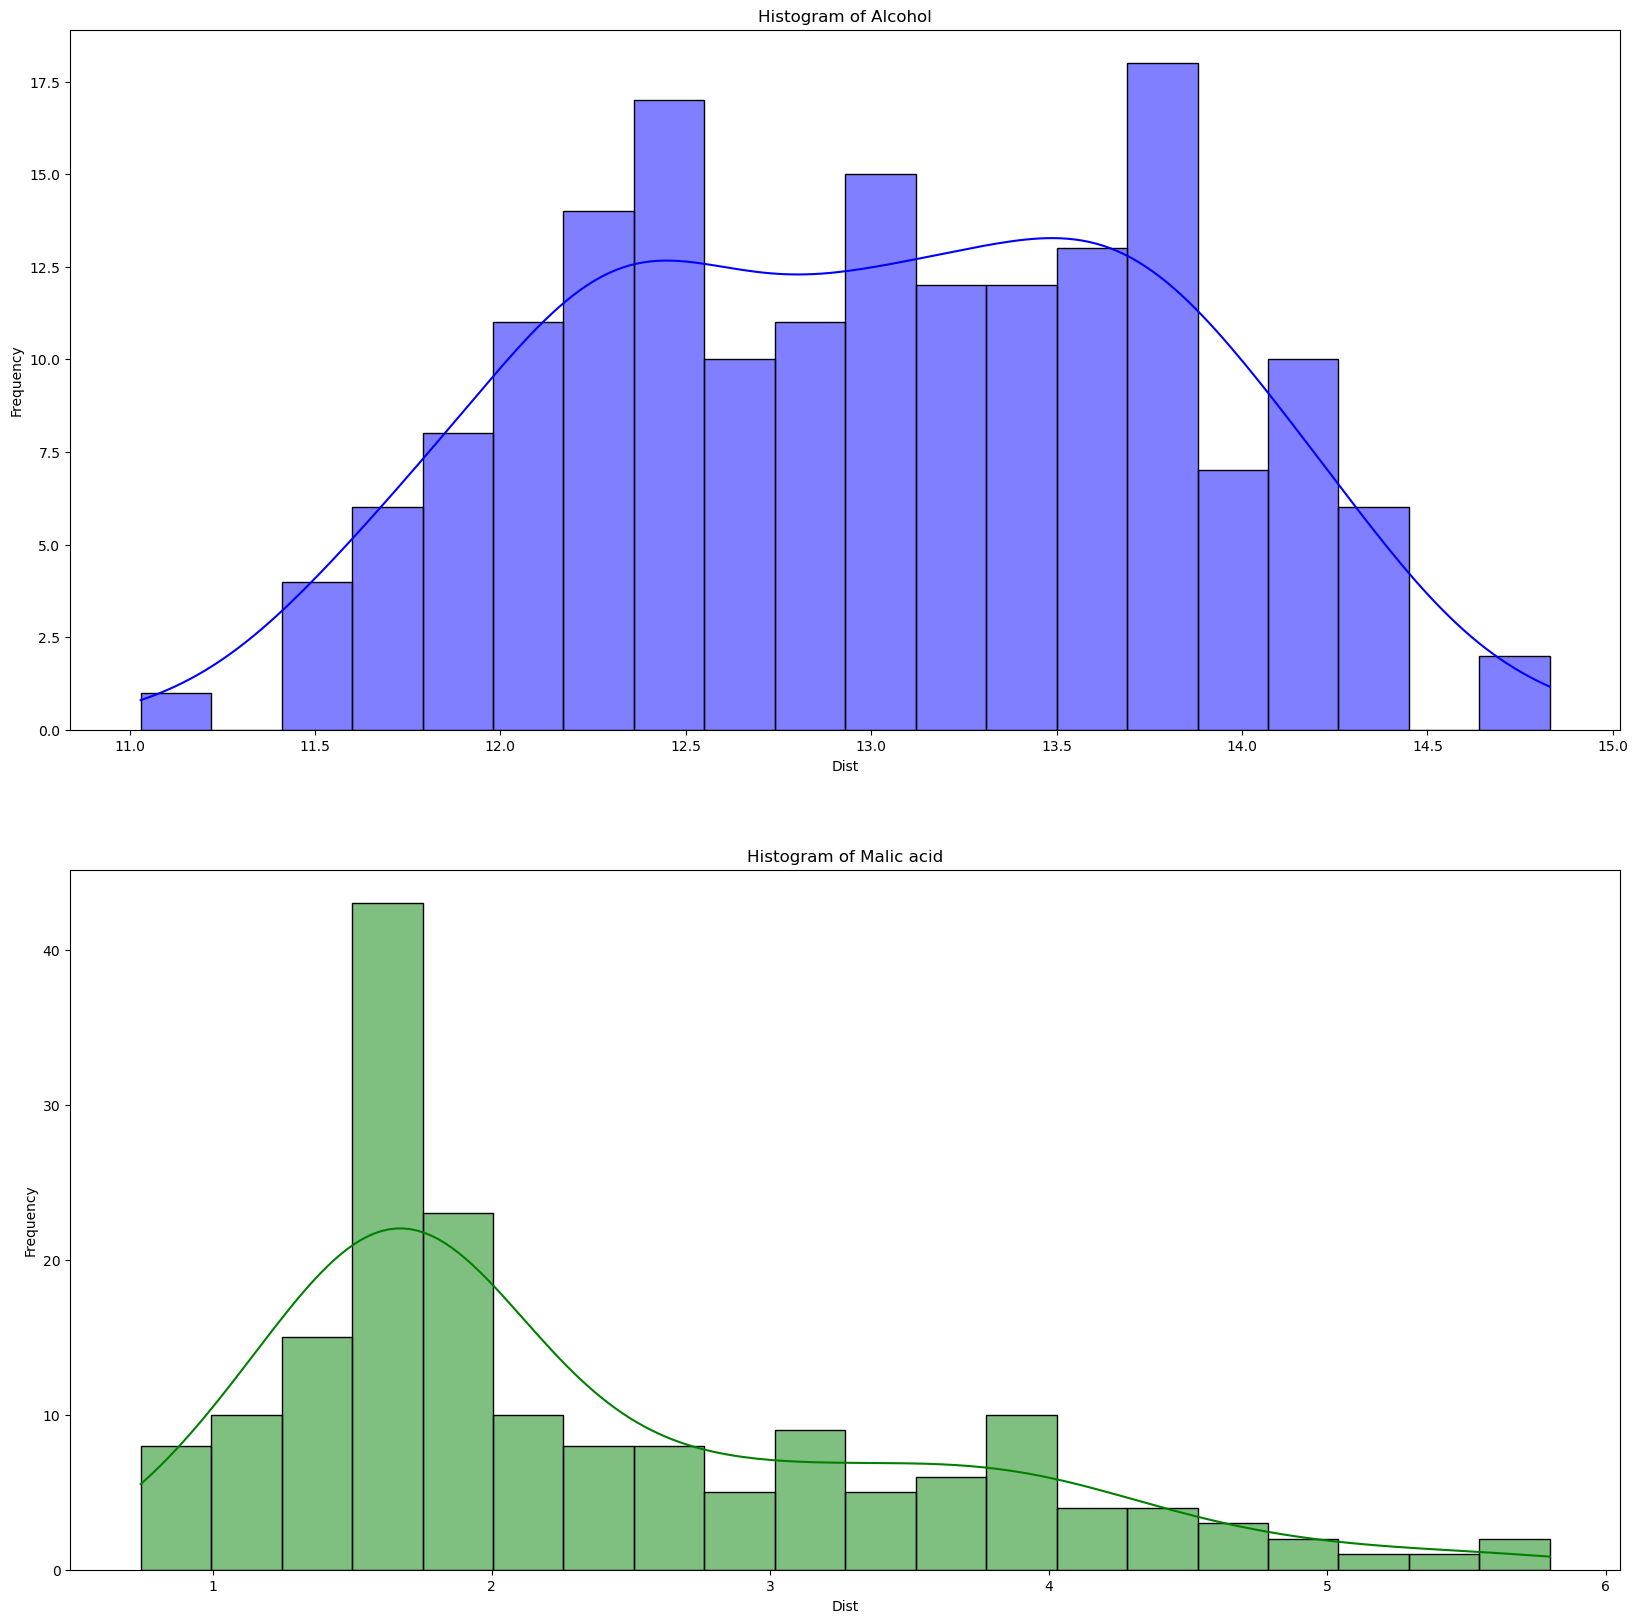

In [7]:
fig,axes=plt.subplots(2,1,figsize=(20,20))

sns.histplot(ax=axes[0],data = df['Alcohol'],kde=True,bins=20,color='blue')
axes[0].set_title('Histogram of Alcohol')
axes[0].set_xlabel('Dist')
axes[0].set_ylabel('Frequency')

sns.histplot(ax=axes[1],data = df['Malic acid'],kde=True,bins=20,color='green')
axes[1].set_title('Histogram of Malic acid')
axes[1].set_xlabel('Dist')
axes[1].set_ylabel('Frequency')

Text(0, 0.5, 'Sample Quantiles')

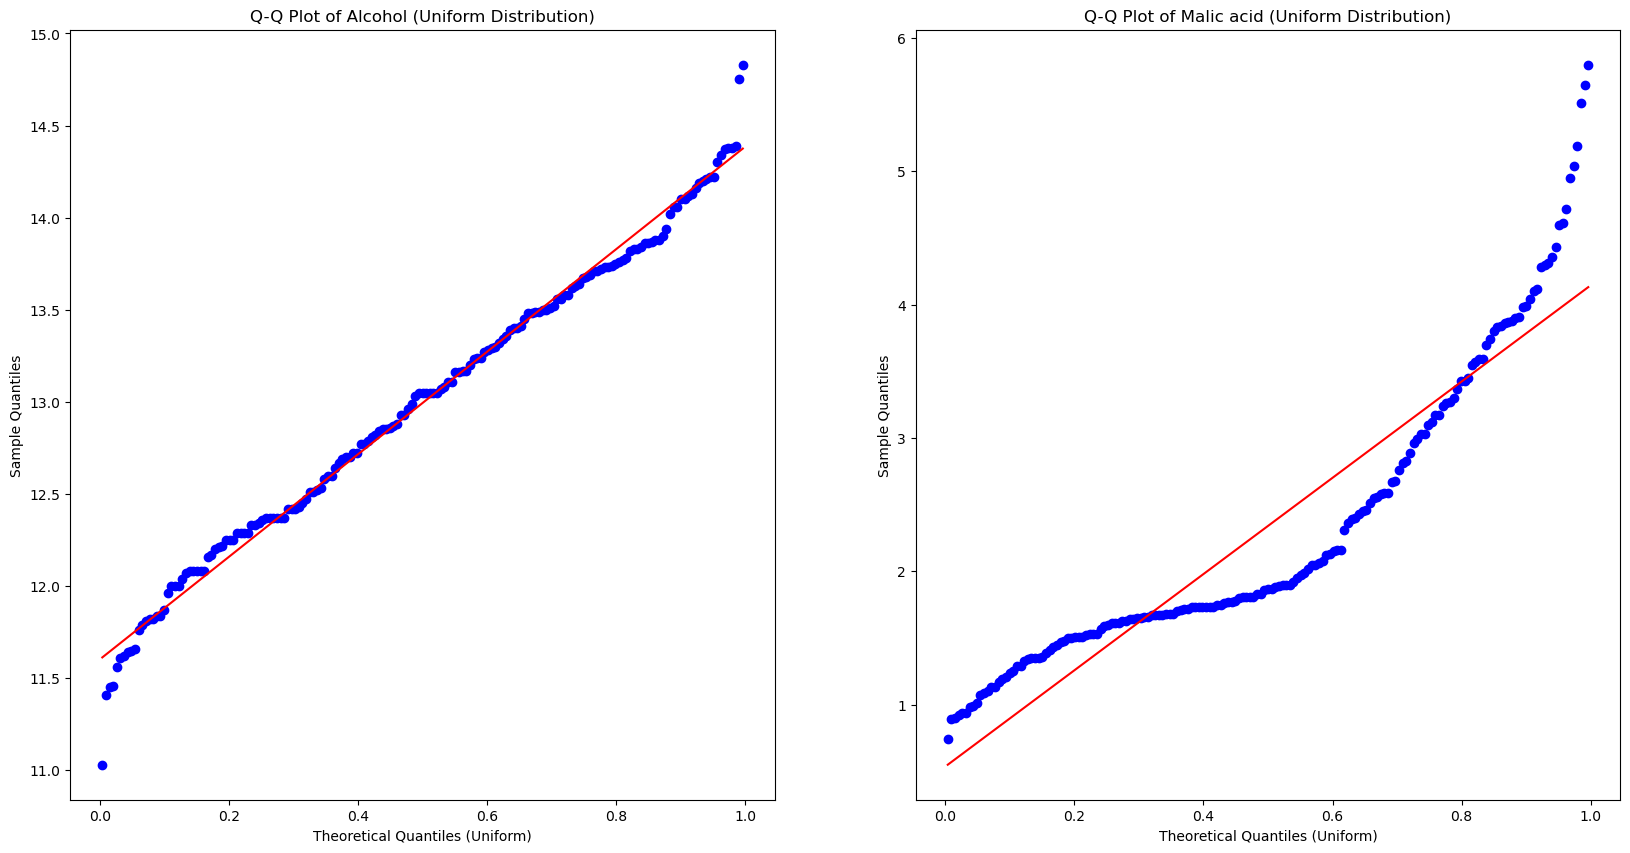

In [8]:
fig,axes=plt.subplots(1,2,figsize=(20,10))

import scipy.stats as stats

stats.probplot(df['Alcohol'], dist="uniform", plot=axes[0])
axes[0].set_title('Q-Q Plot of Alcohol (Uniform Distribution)')
axes[0].set_xlabel('Theoretical Quantiles (Uniform)')
axes[0].set_ylabel('Sample Quantiles')

stats.probplot(df['Malic acid'],dist="uniform",plot=axes[1])
axes[1].set_title('Q-Q Plot of Malic acid (Uniform Distribution)')
axes[1].set_xlabel('Theoretical Quantiles (Uniform)')
axes[1].set_ylabel('Sample Quantiles')

For Alcohol a=2.9933052573091907, b=2.7951257704928754
For Malic acid a=0.9856446538302643, b=2.106965320211083


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


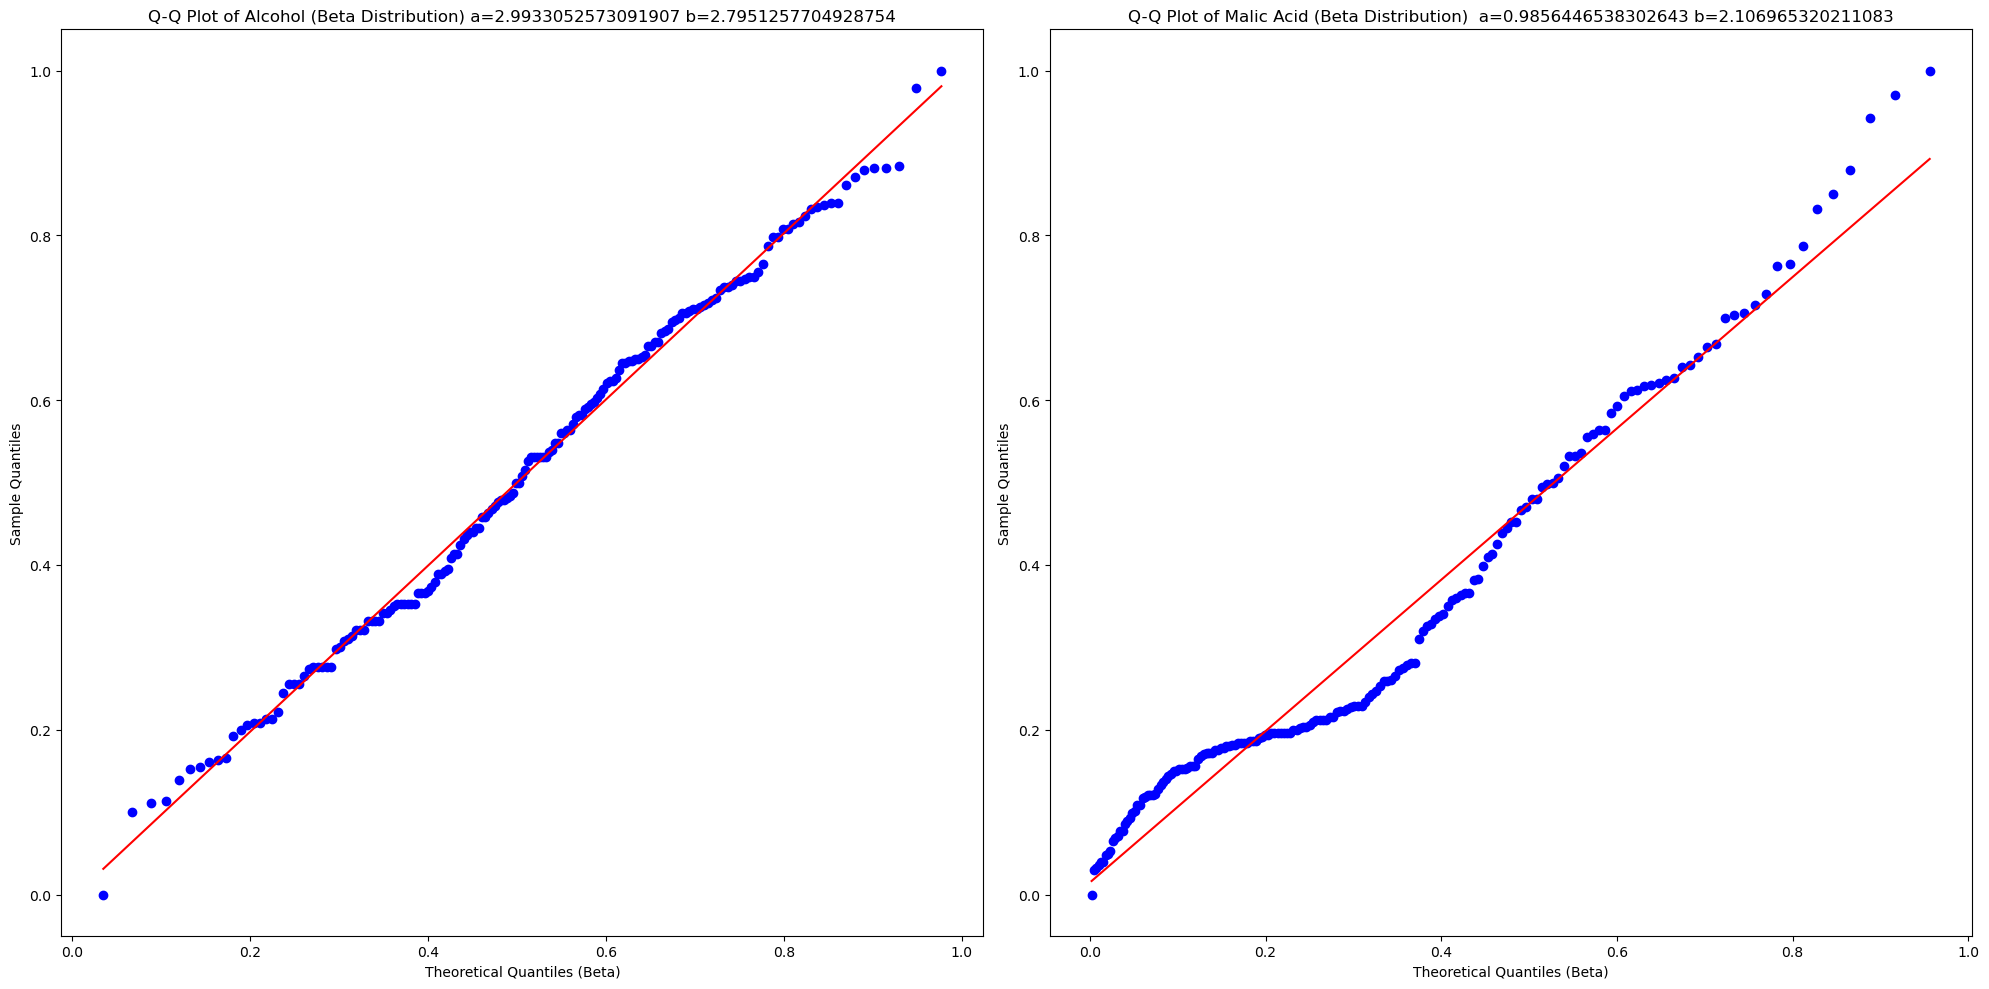

In [9]:
# Function to scale data to [0, 1] for Beta distribution
def scale_to_unit_interval(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# --- Alcohol ---
alcohol_scaled = scale_to_unit_interval(df['Alcohol'])
a, b, loc, scale = stats.beta.fit(alcohol_scaled)
print(f"For Alcohol a={a}, b={b}")
stats.probplot(alcohol_scaled, dist=stats.beta, sparams=(a, b, loc, scale), plot=axes[0])
axes[0].set_title(f'Q-Q Plot of Alcohol (Beta Distribution) a={a} b={b}')
axes[0].set_xlabel('Theoretical Quantiles (Beta)')
axes[0].set_ylabel('Sample Quantiles')

# --- Malic acid ---
malic_scaled = scale_to_unit_interval(df['Malic acid'])
a, b, loc, scale = stats.beta.fit(malic_scaled)
print(f"For Malic acid a={a}, b={b}")
stats.probplot(malic_scaled, dist=stats.beta, sparams=(a, b, loc, scale), plot=axes[1])
axes[1].set_title(f'Q-Q Plot of Malic Acid (Beta Distribution)  a={a} b={b}')
axes[1].set_xlabel('Theoretical Quantiles (Beta)')
axes[1].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()


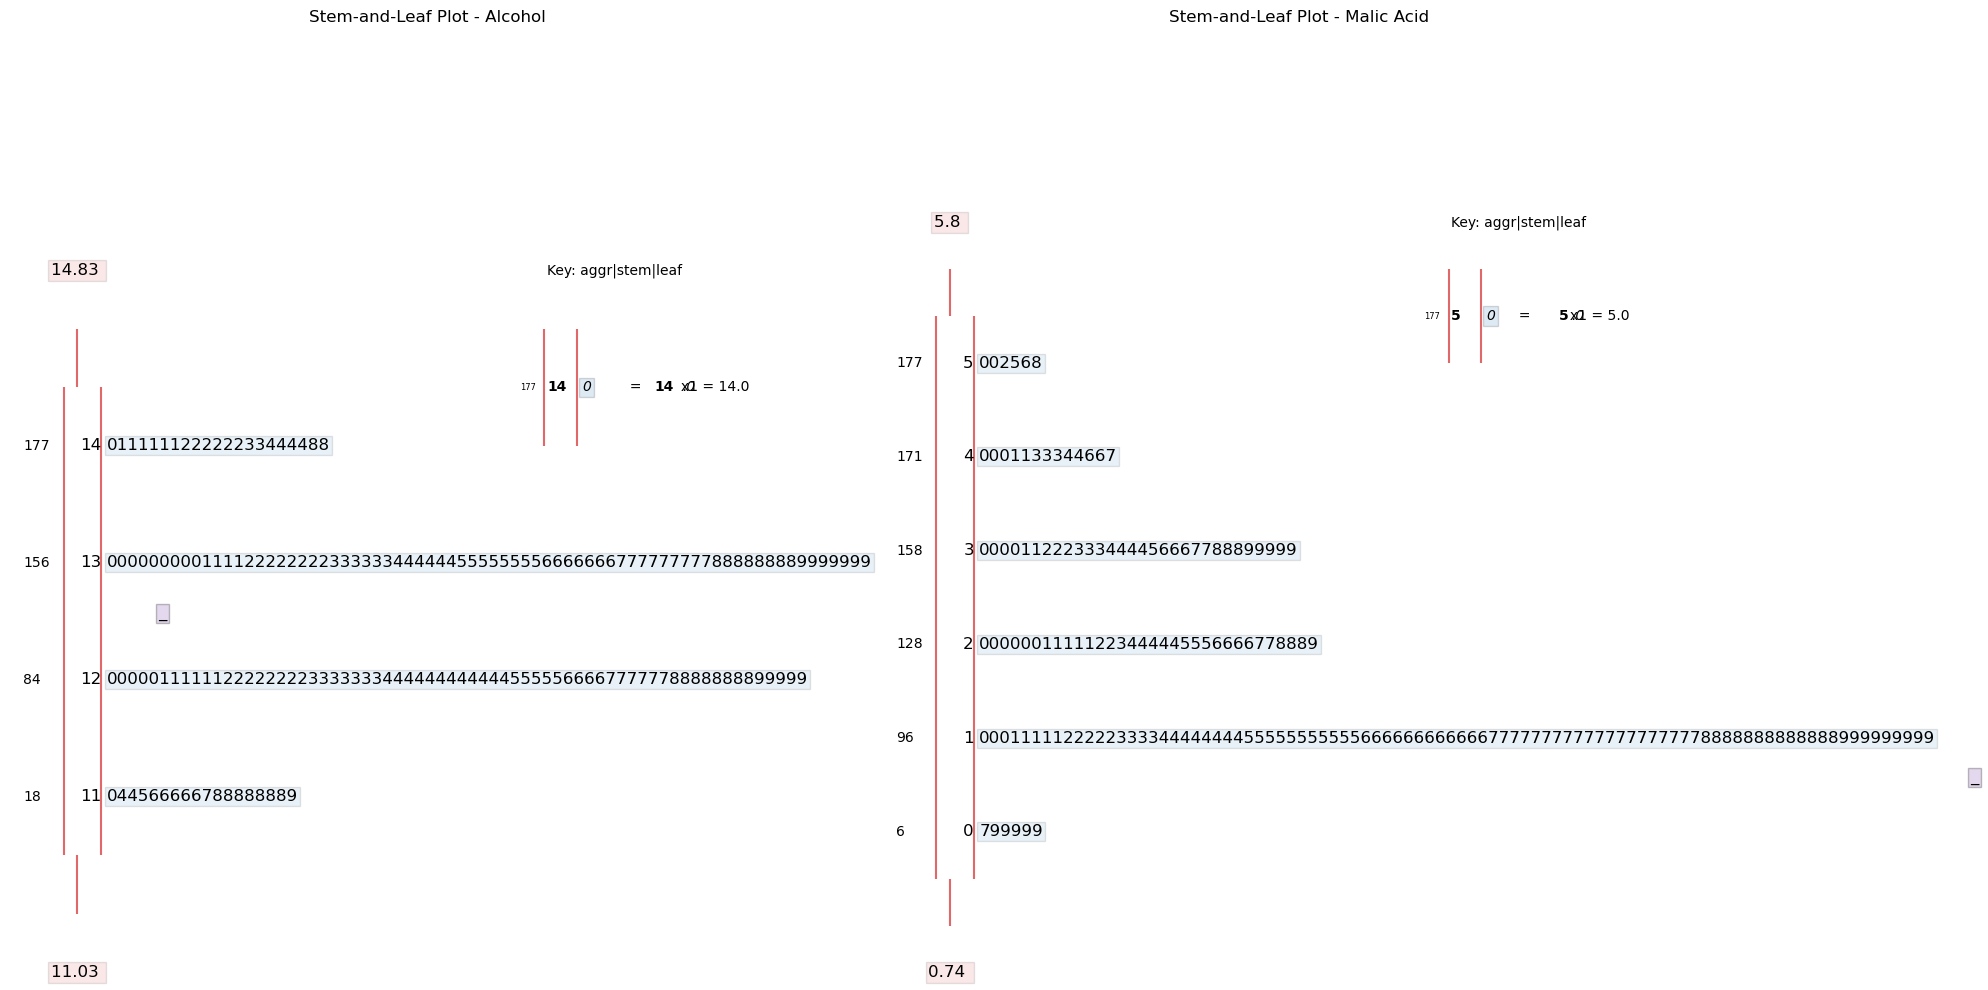

In [10]:
import stemgraphic
import matplotlib.pyplot as plt

# Stem-and-leaf for Alcohol
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

stemgraphic.stem_graphic(df['Alcohol'], scale=1, ax=axes[0])
axes[0].set_title("Stem-and-Leaf Plot - Alcohol")

stemgraphic.stem_graphic(df['Malic acid'], scale=1, ax=axes[1])
axes[1].set_title("Stem-and-Leaf Plot - Malic Acid")

plt.tight_layout()
plt.show()

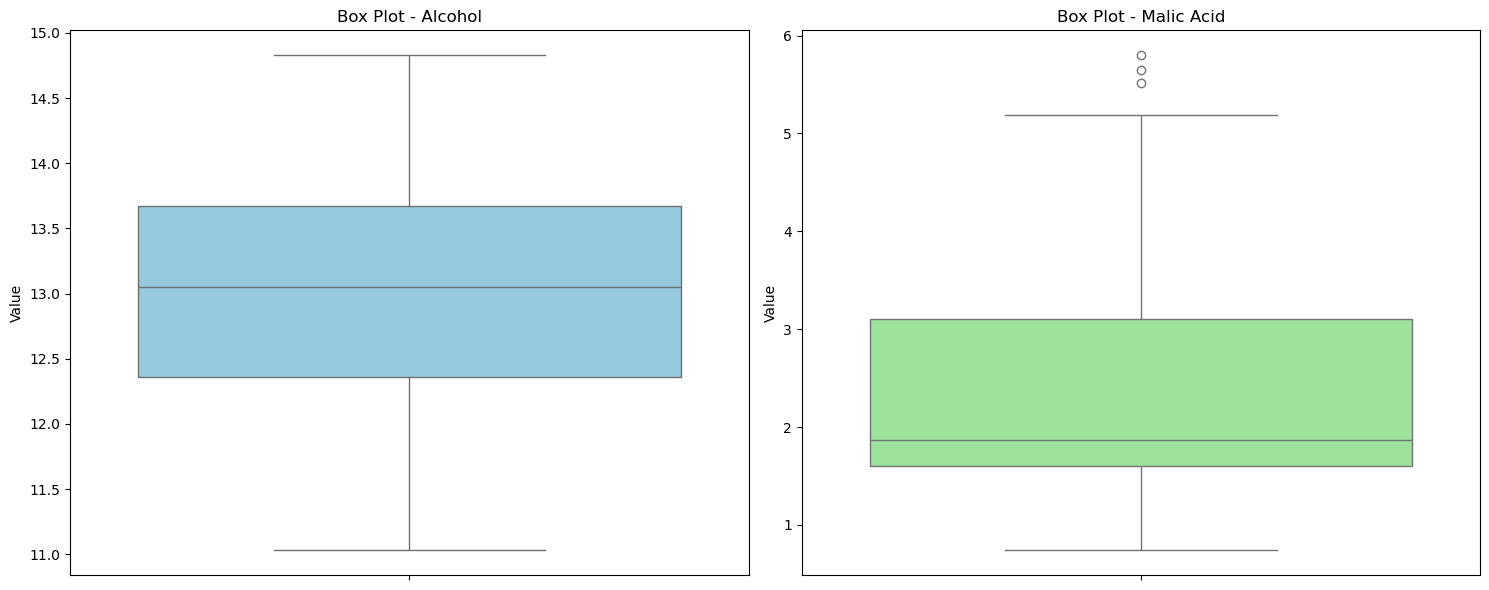

In [11]:
# Create figure
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot for Alcohol
sns.boxplot(y=df['Alcohol'], ax=axes[0], color='skyblue')
axes[0].set_title('Box Plot - Alcohol')
axes[0].set_ylabel('Value')

# Box plot for Malic acid
sns.boxplot(y=df['Malic acid'], ax=axes[1], color='lightgreen')
axes[1].set_title('Box Plot - Malic Acid')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

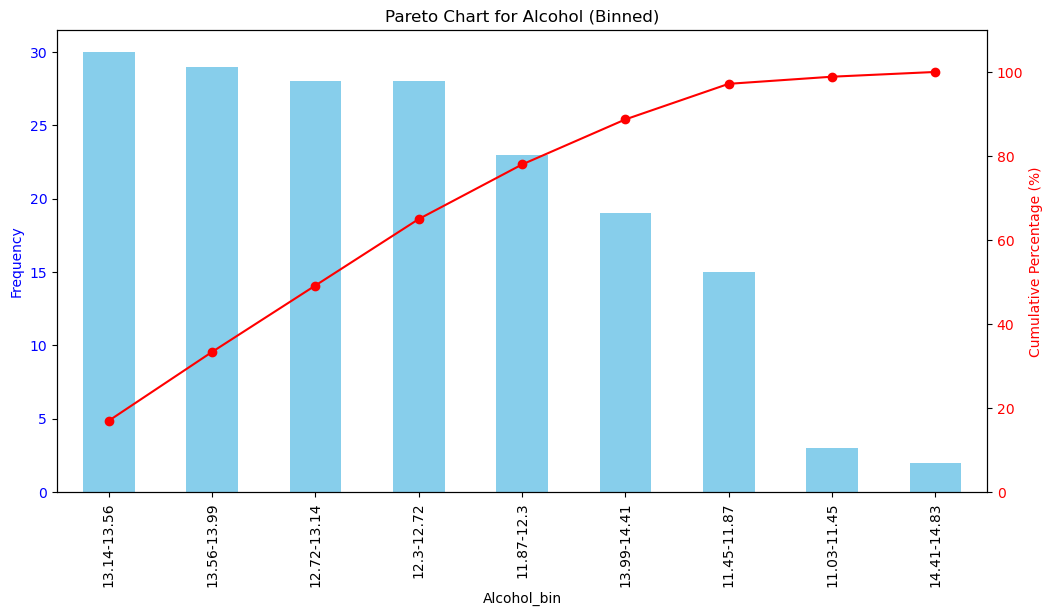

In [12]:
# Bin Alcohol data
bins = np.linspace(df['Alcohol'].min(), df['Alcohol'].max(), 10)  # 9 bins
bin_labels = [f"{round(bins[i],2)}-{round(bins[i+1],2)}" for i in range(len(bins)-1)]
df['Alcohol_bin'] = pd.cut(df['Alcohol'], bins=bins, labels=bin_labels, include_lowest=True)

# Frequency count per bin
freq = df['Alcohol_bin'].value_counts().sort_values(ascending=False)

# Cumulative percentage
cumperc = freq.cumsum() / freq.sum() * 100

fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot of frequencies
freq.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_ylabel('Frequency', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot of cumulative percentage
ax2 = ax1.twinx()
cumperc.plot(color='red', marker='o', ax=ax2)
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 110)

plt.title('Pareto Chart for Alcohol (Binned)')
plt.xticks(rotation=45)
plt.show()

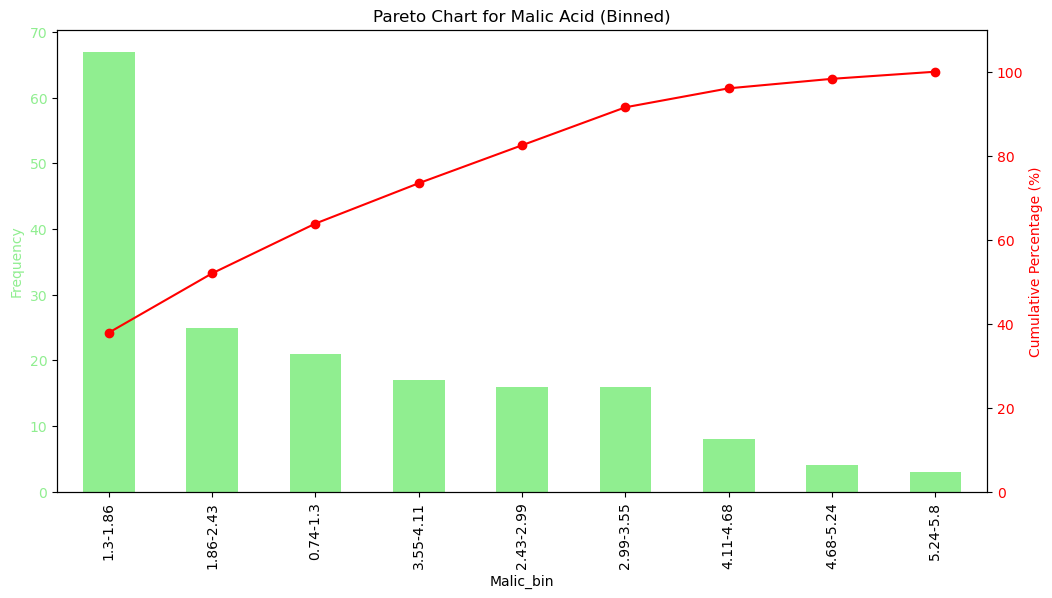

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Bin Malic acid data
bins = np.linspace(df['Malic acid'].min(), df['Malic acid'].max(), 10)  # 9 bins
bin_labels = [f"{round(bins[i],2)}-{round(bins[i+1],2)}" for i in range(len(bins)-1)]
df['Malic_bin'] = pd.cut(df['Malic acid'], bins=bins, labels=bin_labels, include_lowest=True)

# Frequency count per bin
freq = df['Malic_bin'].value_counts().sort_values(ascending=False)

# Cumulative percentage
cumperc = freq.cumsum() / freq.sum() * 100

fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot of frequencies in green
freq.plot(kind='bar', color='lightgreen', ax=ax1)
ax1.set_ylabel('Frequency', color='lightgreen')
ax1.tick_params(axis='y', labelcolor='lightgreen')

# Line plot of cumulative percentage
ax2 = ax1.twinx()
cumperc.plot(color='red', marker='o', ax=ax2)
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 110)

plt.title('Pareto Chart for Malic Acid (Binned)')
plt.xticks(rotation=45)
plt.show()

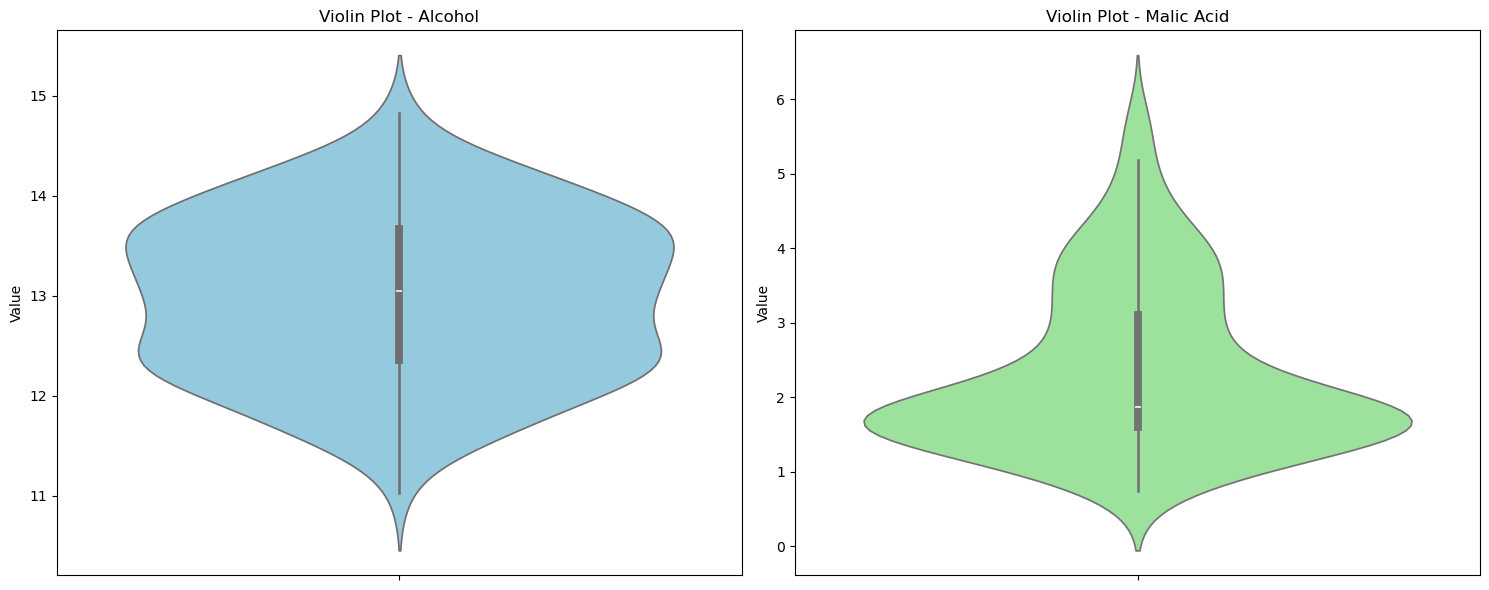

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Violin plot for Alcohol
sns.violinplot(y=df['Alcohol'], ax=axes[0], color='skyblue')
axes[0].set_title('Violin Plot - Alcohol')
axes[0].set_ylabel('Value')

# Violin plot for Malic acid
sns.violinplot(y=df['Malic acid'], ax=axes[1], color='lightgreen')
axes[1].set_title('Violin Plot - Malic Acid')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()